# <span id="toc">  Esercizio 2 - Generatore di numeri pseudo-casuali </span>

- [Esercizio 2.1](#ex02_1)

- [Esercizio 2.2](#ex02_2)

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

## <span id="ex02_1">  Esercizio 2.1 </span>[^](#toc)

In questo esercizio voglio calcolare con metodi Monte Carlo il seguente integrale, il cui risultato è noto analiticamente:

$$
I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1
$$

Inizialmente estraggo i punti in modo uniforme nell’intervallo $[0,1)$ e successivamente utilizzo il metodo dell’**Importance Sampling**, che permette di generare numeri casuali secondo una distribuzione di probabilità $p(x)$ scelta in modo da concentrare più estrazioni nelle regioni in cui l’integranda assume valori significativi.

Teoricamente se si potesse campionare con $p(x)$ identica all’integranda normalizzata, la varianza della stima si annullerebbe. Nella pratica, scegliere una $p(x)$ che approssima l’andamento dell’integranda consente comunque di ridurre notevolmente la varianza rispetto al campionamento uniforme. 

Per entrmabe le tipologie di campionamento ho effettuando $M = 10^6$ estrazioni totali, suddivisi in $N = 100$ blocchi.

### Uniform sampling

In questa prima parte ho stimato l’integrale utilizzando per la variabile $x$ un campionamento uniforme in $[0,1)$.

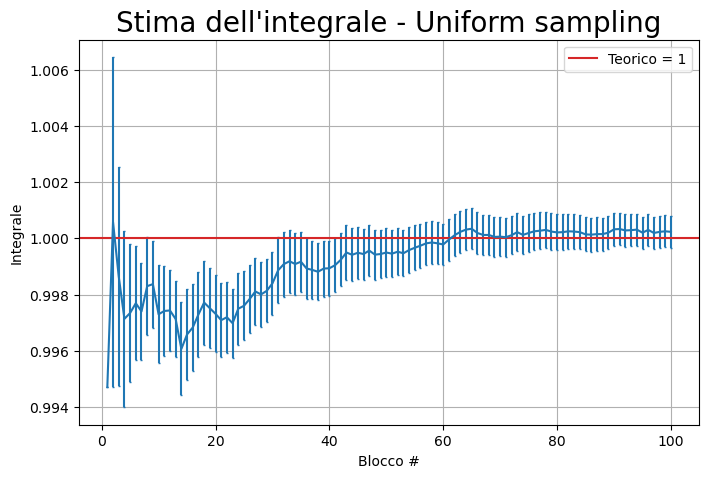

Valore medio finale dell'integrale =  1.00023
Incertezza =  0.000565679


In [2]:
# Uniform sampling
plt.figure(figsize=(8,5))

block, I_ave, I_err = np.loadtxt('ex02_1/OUTPUT/integral.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, I_ave, yerr=I_err, capsize=1)
plt.axhline(y=1, color='tab:red', linestyle='-', label='Teorico = 1')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('Integrale', fontsize=10)
plt.title("Stima dell'integrale - Uniform sampling", fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print("Valore medio finale dell'integrale = ", I_ave[-1])
print('Incertezza = ', I_err[-1])

### Importance sampling

Per risolvere l'integrale proposto utilizzando il metodo dell'importance sampling, la distribuzione di probabilità più semplice che si possa scegliere è:

$$
p(x) = 2(1-x)
$$

e invertendo la CDF si ottiene una legge lineare di campionamento del tipo:

$$
x = 1 - \sqrt{1-y}
$$
con $y$ generato uniformemente in $[0,1)$.

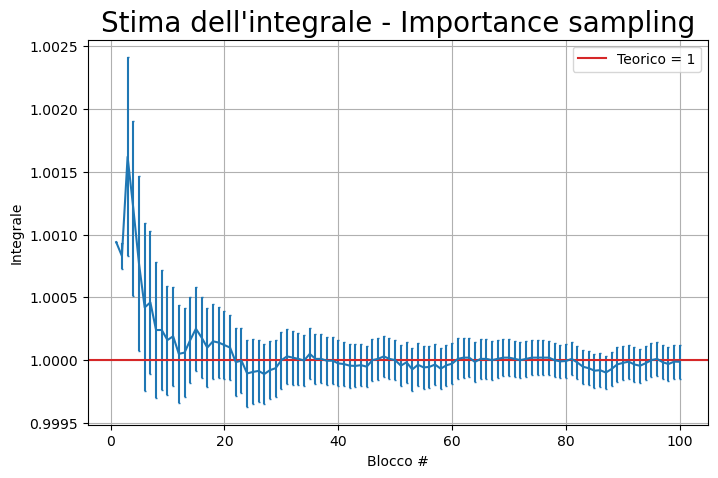

Valore medio finale dell'integrale =  0.999987
Incertezza =  0.000134136


In [3]:
# Importance sampling
plt.figure(figsize=(8,5))

block, Iis_ave, Iis_err = np.loadtxt('ex02_1/OUTPUT/integral_is.dat', skiprows=1, usecols=(0,2,3), unpack=True)

plt.errorbar(block, Iis_ave, yerr=Iis_err, capsize=1)
plt.axhline(y=1, color='tab:red', linestyle='-', label='Teorico = 1')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('Integrale', fontsize=10)
plt.title("Stima dell'integrale - Importance sampling", fontsize=20)
plt.legend()
plt.grid(True)

plt.show()

print("Valore medio finale dell'integrale = ", Iis_ave[-1])
print('Incertezza = ', Iis_err[-1])

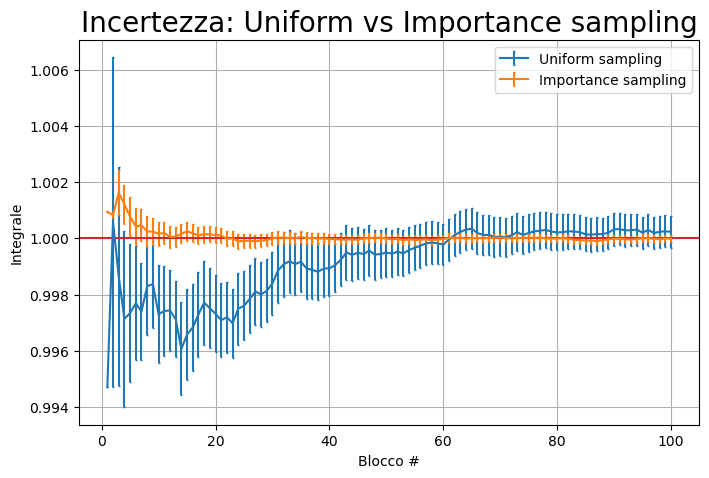

In [4]:
plt.figure(figsize=(8,5))

plt.errorbar(block, I_ave, yerr = I_err, capsize=1, label='Uniform sampling')
plt.errorbar(block, Iis_ave, yerr = Iis_err, capsize=1, label='Importance sampling')
plt.axhline(y=1, color='tab:red', linestyle='-')
plt.xlabel('Blocco #', fontsize=10)
plt.ylabel('Integrale', fontsize=10)
plt.title("Incertezza: Uniform vs Importance sampling", fontsize=20)
plt.grid(True)

plt.legend()

plt.show()

Dai grafici si osserva che con entrambi i metodi di campionamento, i risultati sono compatibili con il valore teorico dell'integrale entro l'incertezza statistica.

Nel secondo caso si nota chiaramente una convergenza più rapida al valore atteso e una maggiore stabilità della stima all’aumentare dei blocchi, con barre d’errore più corte. Come previsto il metodo dell’importance sampling risulta quindi più efficiente e preciso nella stima del risultato a parità di punti campionati.

## <span id="ex02_2">  Esercizio 2.2 </span>[^](#toc)

In questa parte dell’esercitazione simulo un **Random Walk (RW)** tridimensionale, sia su un reticolo cubico sia nello spazio continuo.  

L’obiettivo è studiare l’andamento della distanza media dall’origine $\sqrt{\langle |\mathbf{r}_n|^2 \rangle}$ dopo $n$ step e verificare che segua una legge di tipo diffusivo del tipo $f(n) = k\sqrt{n}$ in accordo con il comportamento atteso per un processo di diffusione casuale.  

Ho considerato $M = 10^4$ random walk da $100$ step ciascuno, suddivisi in $N = 100$ blocchi.

### Random Walk discreto

Il reticolo su cui ci si muove in questo caso è costruito in modo tale che il RW parte dall'origine e ad ogni passo si muove lungo una delle tre direzioni cartesiane ($x,y,z$) scelta casualmente, con verso $\pm 1$.

Ho stimato la distanza media dall’origine in funzione del numero di step, su cui infine ho applicato un fit per verificare la compatibilità con la legge diffusiva.

In [5]:
# Legge diffusiva
def f (x, k):
    return k * np.sqrt(x)

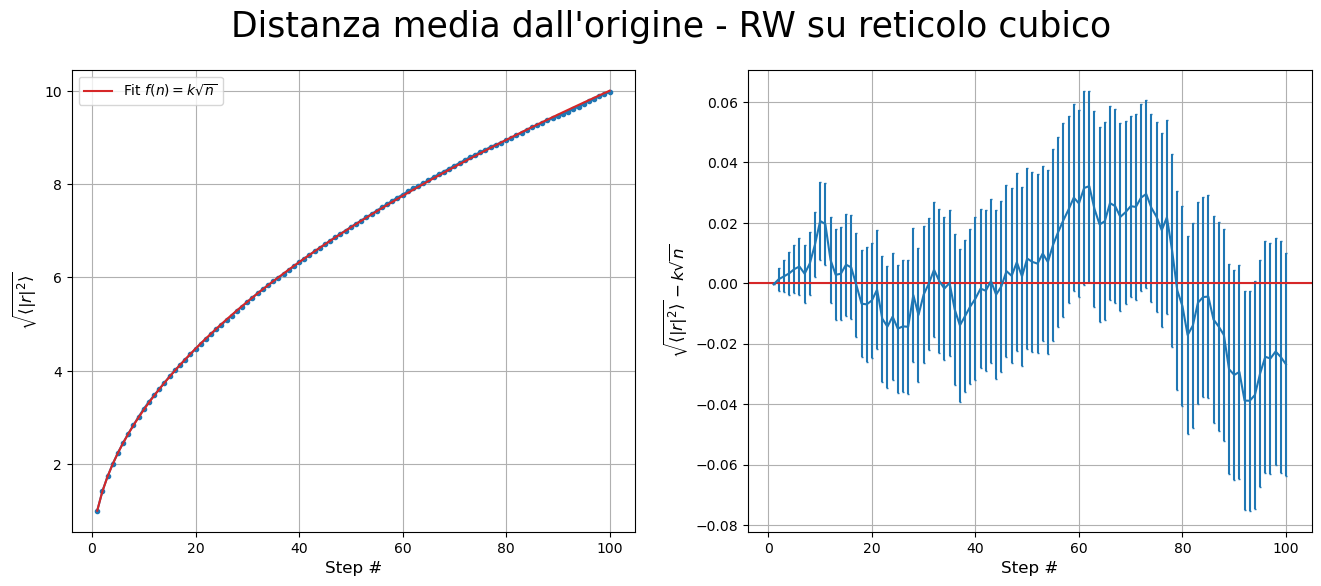

Parametro del fit k = 1.0003478997627504


In [6]:
# RW discreto
plt.figure(figsize=(16,6))
plt.suptitle("Distanza media dall'origine - RW su reticolo cubico", fontsize=25)

step, r_d, err_d = np.loadtxt("ex02_2/OUTPUT/rw_discrete.dat", skiprows=1, unpack=True)

plt.subplot(1,2,1)
popt, pcov = curve_fit(f, step, r_d)
plt.plot(step, r_d, marker = ".")
plt.plot(step, f(step,*popt), color='tab:red', linewidth=1.5, label='Fit $f(n) = k\sqrt{n}$')
plt.xlabel('Step #', fontsize=12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(step, r_d-f(step,*popt), yerr=err_d, capsize=1)
plt.axhline(y=0, color='tab:red', linestyle='-')
plt.xlabel('Step #', fontsize=12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}-k\sqrt{n}$', fontsize=12)
plt.grid(True)

plt.show()

print('Parametro del fit k =', popt[0])

### Random Walk continuo
Per il cammino continuo ho seguito la stessa procedura, ma ad ogni passo il RW si muove di un’unità in una direzione scelta casualmente nello spazio tridimensionale, campionata estraendo uniformemente $\cos\theta \in [-1,1)$ e $\phi \in [0,2\pi)$.

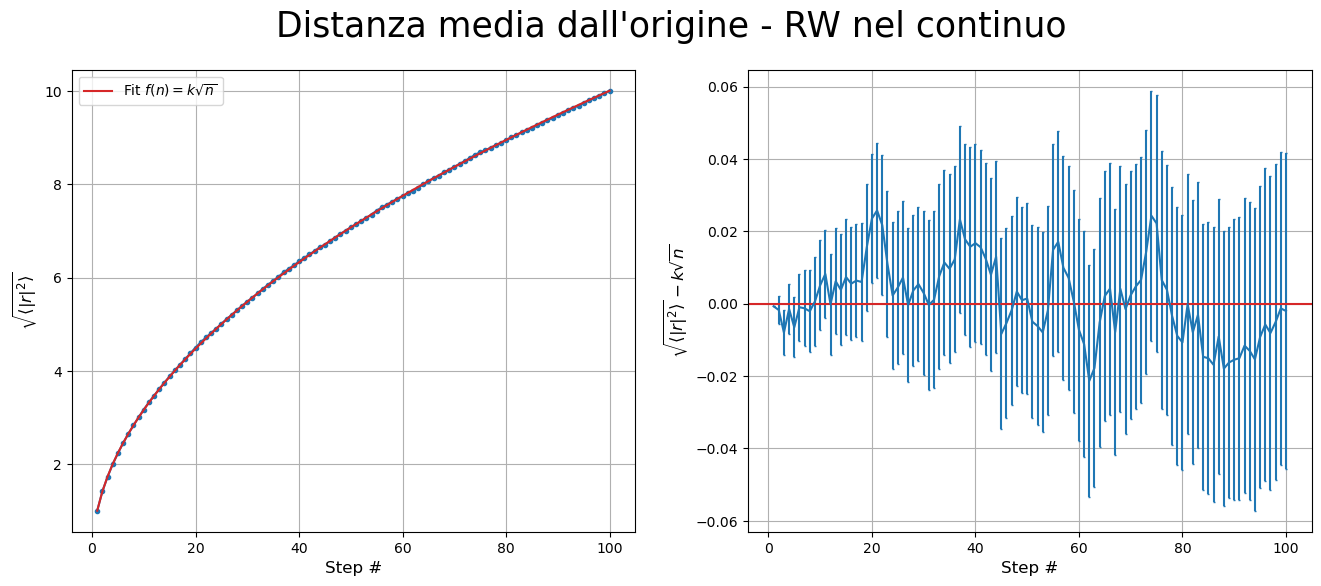

Parametro del fit k = 1.0007333935588905


In [7]:
# RW continuo
plt.figure(figsize=(16,6))
plt.suptitle("Distanza media dall'origine - RW nel continuo", fontsize=25)

step, r_c, err_c = np.loadtxt("ex02_2/OUTPUT/rw_continuous.dat", skiprows=1, unpack=True)

plt.subplot(1,2,1)
popt, pcov = curve_fit(f, step, r_c)
plt.plot(step, r_c, marker = ".")
plt.plot(step, f(step,*popt), color='tab:red', linewidth=1.5, label='Fit $f(n) = k\sqrt{n}$')
plt.xlabel('Step #', fontsize=12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}$', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.errorbar(step, r_c-f(step,*popt), yerr=err_c, capsize=1)
plt.axhline(y=0, color='tab:red', linestyle='-')
plt.xlabel('Step #', fontsize=12)
plt.ylabel(r'$\sqrt{\langle |r|^2 \rangle}-k\sqrt{n}$', fontsize=12)
plt.grid(True)

plt.show()

print('Parametro del fit k =', popt[0])

Entrambi i grafici mostrano che i risultati sono compatibili con il fit $f(n) = k\sqrt{n}$. Questo conferma che su scale termodinamiche il processo di RW può essere considerato un processo diffusivo con $k\simeq 1$.